In [ ]:
## Section 3: Servless Batch ETL : AWS GLUE( GUE API & Pyspark )

## **1. Introduction to GLUE  : Servless ETL using Pyspark**

### AGENDA
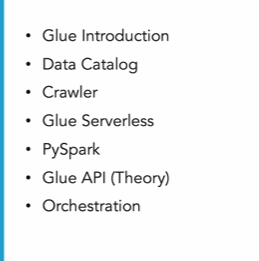

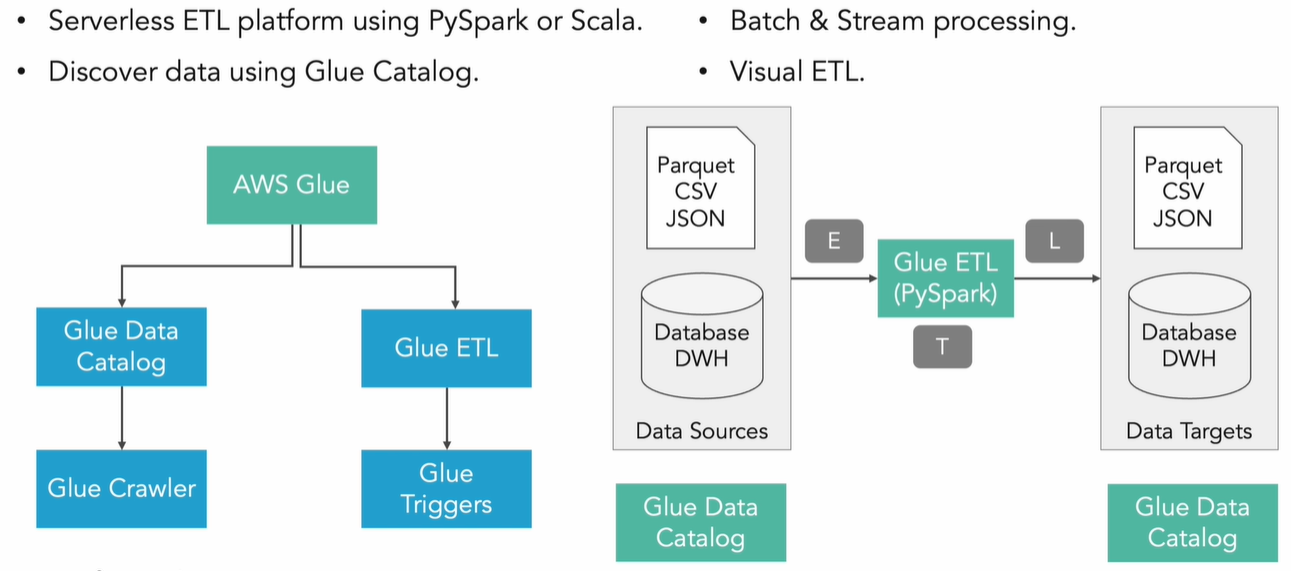

# **2.Data Catalog & Glue Crawler**

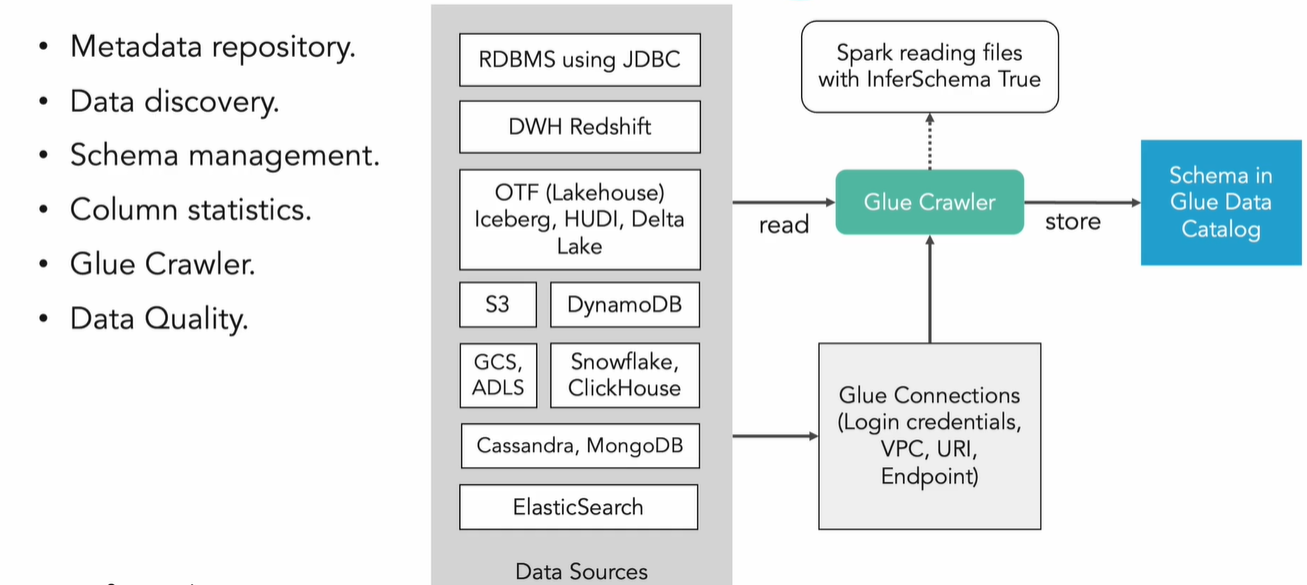

In [ ]:
# Hands ON : Use Glue Crawler to read S3 files and store metadata in Data Catalog
# Dataset : 
# Bucket: data-eng-bucket
'''
/spark/input/account/finance_account_data_1.csv
/spark/input/customer/
/spark/input/ledger/
/spark/input/loan/
/spark/input/transaction/
'''

# Data Catalog 
# Create Database : glue_db

# Tables : we can ceate table manually as well
# Crawlers > create Crawlers
'''
 Add a Data Source : S3 : 
 S3 Path:  s3://data-eng-bucket/input/
 * Crawl all sub-folders
 * IAM Role: glue_dataCalog_role
 * Database: glue_db
 * Crawler Schedule: onDemand
 * Create

'''

## Data Catalog; Table Section : all tables listed There 

## IAM Role: glue_dataCalog_role: AdminstratorAcess, AWSGlueServiceROle

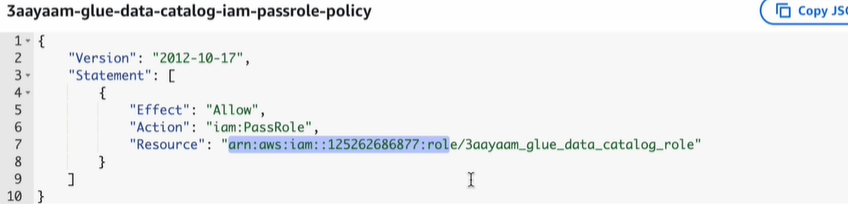

### we can create Iceberg table , in Table Sections
 * Create Iceberg Table: Lakehouse format 

In [ ]:
## Hands on : GLue Connections for other Data Source By Crawler
'''
* IN case S3 its not required
* IN case of database : we need database and 

* Create a VPC
* Craete a Aurora Database
* Public Acess: YES

### Create database: financedb
 * account
 * ledger
 * transaction
'''

## create a crawler for Aurora mySQL SOurce

## Data Catlog >> COnnection or Data Connections 
'''
 * IN marketplace so many connector are there ( )
 * Create Cusome Connector
 * Create Connection
 * auorora
 * Select the Name of instance its bcoz in AWS only otherwise u need to provide all info
 * Db: finance_db
 * username: admin
 * netwrork Option: VPC : VPC-XXXXXXX
 * select of the public subnet 
 * SG : public security group
 * Name: mysql_aurroora_connect
 * create 

 ## Test the Connection >> action >> IAM ROLE: glue_role >> test Connection 
'''
# Crawlers > create Crawlers
'''
 Add a Data Source : JDBC
 * Connection: mysql_aurroora_connect
 * include paht: finance_db
 * IAM Role: glue_dataCalog_role
 * Database: glue_db
 * prefix: aurora_mysql_tb_
 * Crawler Schedule: onDemand
 * Create
'''

###

# **3. Glue Serverless ETL Job Configuration**

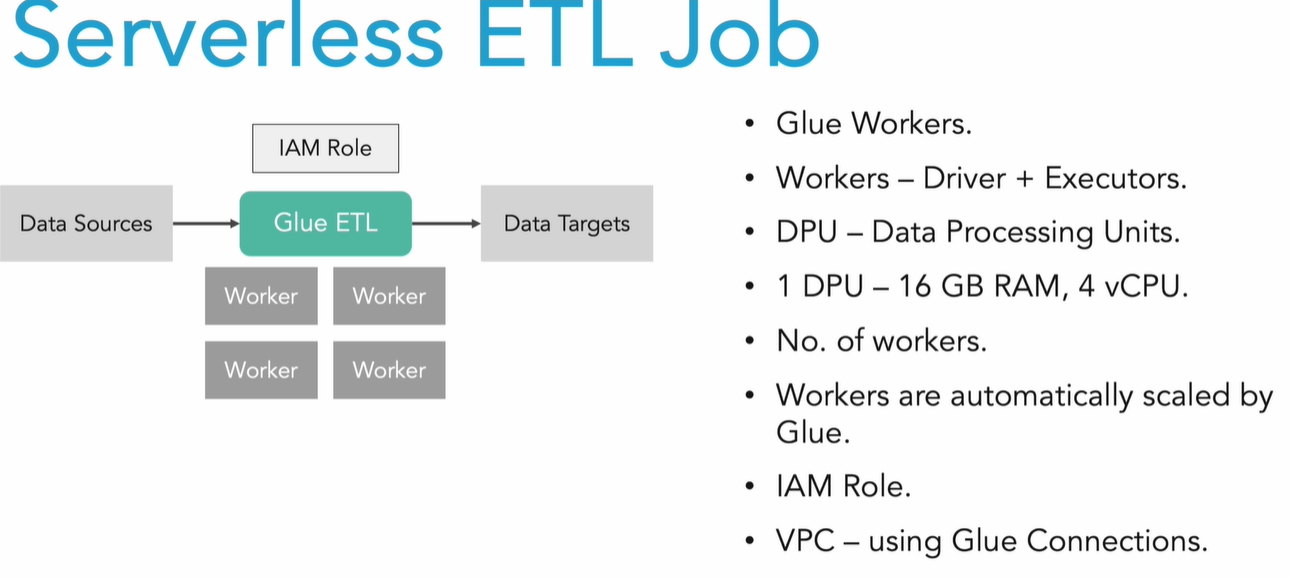

###

In [ ]:
### Console: ### Just the Explanatino of Job ###############
## Script > 
## JOb Details : IAM ROle
## Type : Spark 
## Lanuage : Ptyhtojn3
## Glue Version : Glue 5.0 
## Worker Type: 1X - 8X ( NV has more workers) # G1X 
'''
  
'''
# Enable scale 
## NUm of Workers : 25 
## GEnerate JOb Insights 
## Job Bookmark: Diable
## Fle
## Number or retries 
## JOb Timeout ( minutes): 2880: 8 Hours
## Advance Poperies 
 # Maximum COnconurrency : 1 ( )
## Connection : 
## Addiontal Python Jar path 
## ADditional pytho module path 
## JOb Parameter 


# **4. VIsual ETL**

In [ ]:
## Part1(No Code Transformation) - Configure S3 Data Source
### Select VIsulal ETL 
## SOurces: 
## JOb Details: 
'''
  Name: glue_visault_ELT_s3_to_s3
  IAMROle: glue_data_catalog_role
  GLUE_Version: 5.0
  Language: Python3
  WorkerType: G1X 
  Maximum NUmber of WEorkeres: 10
  GEnerate Job Insights: yes
  JobBOokmark: Enable             (eanle/ Pause/ Disbale --> 
  Retries: 0 
  Job TimeOut: 480 (minute)

## Advance Properties 
  * Script_file_name : glue_visulat_ETL_s3_to_s3.py
  * Script_path: s3://aws-glue-assets-<acountNo>-ap-south-1/scripts/
  * JOb Metrics: Enable
  * Job Observaiablility metrices; Enable
  * Spark UI Logs Path : s3://aws-glue-assets-<acountNo>-ap-south-1/sparkHistoryLogs/
  * Maximum Concurrency : 5
 * Temporary Path : s3://aws-glue-assets-<acountNo>-ap-south-1/temporary/
## Save the JOb
'''
### Visual Section
## Source : Click on 5 S3 
## Select First S3 Source 
'''
  * Name: s3_account
  * S3 source_type: S3 Location
  * S3 URL : s3://data-engg-vol/input/account/ ( s3 URI)
  * Data Format: CSV 
  * DElimiter: ,
  * Quoite Chater: ""
  * First Line of source cotnaines header : True
  * Addeintal 
    - Let AWS GLue Autmally choose a sample file 
    Save this
'''
## Select Second S3 Source 
'''
  * Name: s3_customer
  * S3 source_type: S3 Location
  * S3 URL : s3://data-engg-vol/input/customer/ ( s3 URI)
  * Data Format: CSV 
  * DElimiter: ,
  * Quoite Chater: ""
  * First Line of source cotnaines header : True
  * Addeintal 
    - Let AWS GLue Autmally choose a sample file 
    Save this
'''
## Select TRhird S3 Source 
'''
  * Name: s3_ledger
  * S3 source_type: Data Catalog Table
  * Database: glue_db
  * Tbale: ledger
  * Save this
'''
## Select fourth S3 Source 
'''
  * Name: s3_ledger
  * S3 source_type: Data Catalog Table
  * Database: glue_db
  * Tbale: ledger
  * Save this
'''
## Select fifpth S3 Source 
'''
  * Name: s3_loadn
  * S3 source_type: Data Catalog Table
  * Database: glue_db
  * Tbale: loan
  * Save this
'''
## Select fifpth S3 Source 
'''
  * Name: s3_transaction
  * S3 source_type: Data Catalog Table
  * Database: glue_db
  * Tbale: transaction
  * Save this
'''

In [ ]:
############### Transformation ###################
## Part2(No Code Transformation) - Spark Transformation
## Add Nodes 1 >> JOIN 
'''
  * Note Parents : S3_transaction, s3_account
  * Name: transaction_account_joined
  * First Select Only 2 
  * Ask glue to add right prefix for resolve
  * Join Type: Inner 
  * Change the name of resolve norde: s3_account_renamed
  * Join Condition : Add Condtion 
     * S3_transaction: src_acount_id
     * s3_account_rename: right_account_id
 * SAVE
'''

## Add Nodes 2 >> JOIN 
'''
  * Name: txn_acc_cx_joined
  * First Select Only 2 
  * Node Parents : transaction_account_joined, S3_customer
  * Ask glue to add right prefix for resolve
  * Join Type: Inner 
  * Change the name of resolve norde: s3_account_renamed
  * Join Condition : Add Condtion 
     * S3_customer: acount_id
     * transaction_account_joined: right_account_id
 * SAVE
'''

## Add Nodes 3 >> JOIN 
'''
  * Name: txn_acc_cx_ledger_joined
  * First Select Only 2 
  * Node Parents : txn_acc_cx_joined, S3_ledger
  * Ask glue to add right prefix for resolve
  * Join Type: Inner 
  * Change the name of resolve norde: s3_account_renamed
  * Join Condition : Add Condtion 
     * S3_ledger: right_transaction_id
     * txn_acc_cx_joined: transaction_id
 * SAVE
'''

## Add Nodes 4 >> JOIN 
'''
  * Name: txn_acc_cx_ledger_loan_joined
  * First Select Only 2 
  * Node Parents : txn_acc_cx_joined, S3_loan
  * Ask glue to add right prefix for resolve
  * Join Type: Inner 
  * Change the name of resolve norde: s3_account_renamed
  * Join Condition : Add Condtion 
     * S3_loan: right_customer_id
     * txn_acc_cx_ledger_loan_joined: customer_id
 * SAVE
'''

## Drop Field s 
'''
 * Parent : node5 Above
 * all field with right_ select those

'''
## Rename Filed1
'''
   * right_balance : account_balance
'''
## Rename Filed2
'''
   * right_term_month : loan_term_month
'''
## Rename Filed3
'''
   * right_amout : ledger_amout
'''

## Deetect Senisitve Dfata 
'''
  * FInd COlumns that contains sensitive data
  * Sample Portion : 30%
  * Deletecti threadhol: 10
  * INclude all availabe type(256) : fin in 
  * Se;ect globale action(required)
    --> redacct : XXXX

'''

### Target : S3 : 
'''
  output_se32_finance _Data
  Format : Parquet 
  Traget Location: s3://glue_output?fiance_Data_jone_dataset/
  * create a atbale in data catalog (3rd one
  * File partion : 
  database:
  tableName: financel_anbalysi_Data)
  * check_data_qyalyL diable
'''

## Check the Sctripts 
## RUNS : run

In [ ]:
############### Transformation ###################
## Part3(No Code Transformation) - Transformation OUtput
## Delete DEtect PII Schema

# RUn Details : 
'''
 LOgs : 
 # OUtput Logn 
 # Error Logs : 
'''

## INput Arugment
## Logs 
'''
 * Driver 
 * executero
'''

## RUn SInghtis 

## MEtrics 
'''

'''
## Transhooting analysis

## Spark UI 
'''
 * multiple DynamicFrame create ---> reads from RDD -
 * JObs
 * Stage
 * Sotrage
 * Envropemnt
 * 
'''

#### Check the Spark UI for Scuessful job 
'''
 
'''

### Output

### create another job

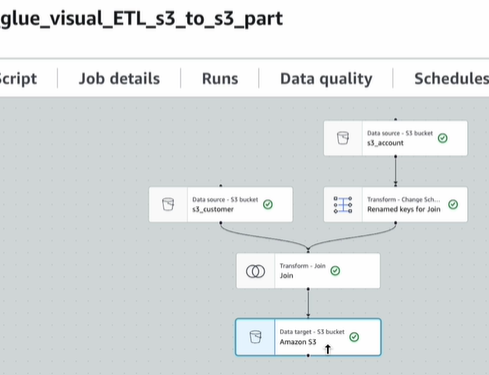

In [ ]:
### check the Table in Glue Data Catalog 
'''
 S3 Output Directory
 * 
'''

## Athena 
'''
 Laynch Query Editor 
 * acc_cust_details 
'''